# Лабораторная работа №5 “Метод опорных векторов”

In [401]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import os
import io
import collections
# _ = nltk.download("stopwords")

## Task 1

Набор данных ex5data1.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит три переменные X<sub>1</sub> и X<sub>2</sub>
(независимые переменные) и y (метка класса). Данные являются линейно
разделимыми.

1. Загрузите данные ex5data1.mat из файла.

In [2]:
task1_file_name = "Data\Lab 5\ex5data1.mat"
mat = loadmat(task1_file_name)  # load mat-file
X = mat['X']
y = mat['y']

2. Постройте график для загруженного набора данных: по осям - переменные X<sub>1</sub>, X<sub>2</sub>, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.

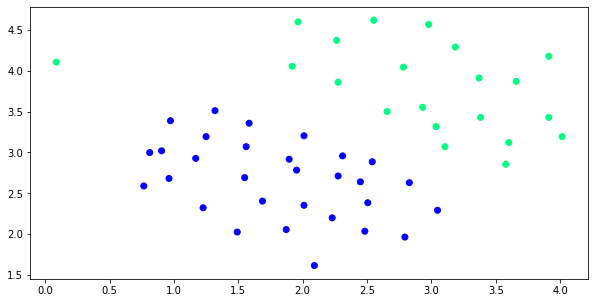

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plt.show()

3. Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.

In [9]:
svclassifier = SVC(C=100,kernel='linear')
svclassifier.fit(X, y[:,0])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = svclassifier.predict(X)

In [11]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

4. Постройте разделяющую прямую для классификаторов с различными
параметрами C = 1, C = 100 (совместно с графиком из пункта 2).
Объясните различия в полученных прямых?

In [12]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

In [16]:
def plot_dividing_line(x, w, b):
    #plot main line
    plt.plot(x, f(x, w, b), 'k')
    #plot top line
    plt.plot(x, f(x, w, b, 1), 'k--')
    #plot bottom line
    plt.plot(x, f(x, w, b, -1), 'k--')

In [14]:
clf = SVC(C = 1, kernel = 'linear')
clf.fit(X, y[:,0])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

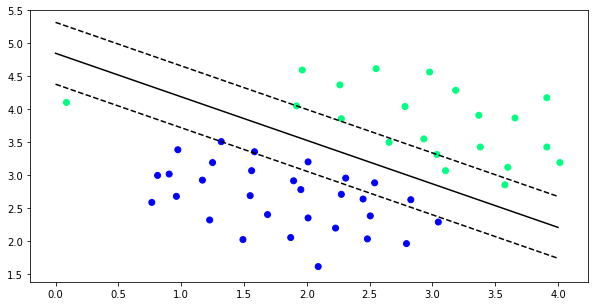

In [19]:
w = clf.coef_.flatten()
b = clf.intercept_.item()
x_lin = np.linspace(0, 4, 10)

fig, ax = plt.subplots(figsize=(10, 5))
plot_dividing_line(x_lin, w, b)
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plt.show()

In [20]:
clf = SVC(C = 100, kernel = 'linear')
clf.fit(X, y[:,0])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

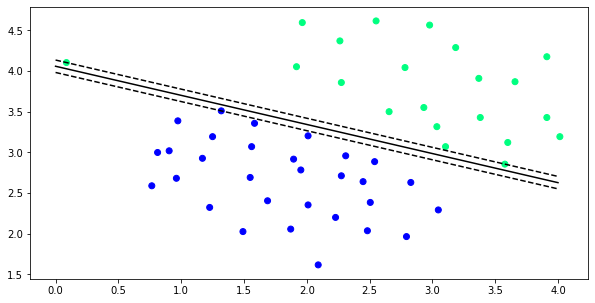

In [21]:
w = clf.coef_.flatten()
b = clf.intercept_.item()
x_lin = np.linspace(0, 4, 10)

fig, ax = plt.subplots(figsize=(10, 5))
plot_dividing_line(x_lin, w, b)
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plt.show()

5. Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.

In [211]:
def gaussian_kernel_function(x, l, sigma):
    return np.exp(-np.sum(np.power(x - l, 2)) / (2 * np.power(sigma, 2)))

def gaussian_kernel(sigma=1.0):
    def calculate_kernel(x, l):
        f_matrix = np.zeros((x.shape[0], l.shape[0]))
        for i, x_i in enumerate(x):
            for j, l_j in enumerate(l):
                f_matrix[i, j] = gaussian_kernel_function(x_i, l_j, sigma)
        return f_matrix
    
    return calculate_kernel

## Task 2

Набор данных ex5data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X<sub>1</sub> и X<sub>2</sub> (независимые переменные) и y (метка класса). Данные являются нелинейно разделимыми.

6. Загрузите данные ex5data2.mat из файла.

In [32]:
task2_file_name = "Data\Lab 5\ex5data2.mat"
mat = loadmat(task2_file_name)  # load mat-file
X = mat['X']
y = mat['y']

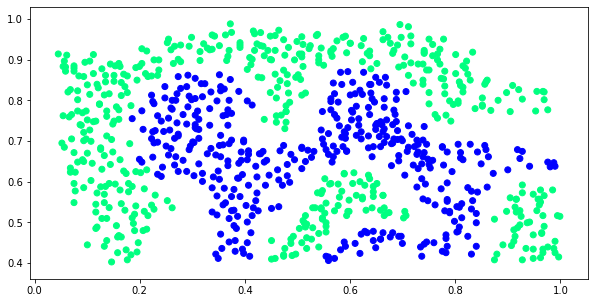

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plt.show()

7. Обработайте данные с помощью функции Гауссового ядра.

In [35]:
def fit_gaussian_svc(c, g, x, y):
    svc = SVC(kernel=gaussian_kernel(g), C=c, max_iter=-1, gamma=g)
    svc.fit(x, y)
    
    return svc

8. Обучите классификатор SVM.

In [42]:
svc_classifier = fit_gaussian_svc(10, 1, X, y[:,0])
y_pred = svc_classifier.predict(X)
np.mean(y_pred == y.flatten()) * 100

81.6917728852839

In [45]:
svc_classifier = SVC(kernel='linear', C=10, gamma = 1)
svc_classifier.fit(X, y[:,0])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred = svc_classifier.predict(X)
np.mean(y_pred == y.flatten()) * 100

57.01042873696408

In [43]:
svc_classifier = SVC(kernel=gaussian_kernel(1), C=10, gamma = 1)
svc_classifier.fit(X, y[:,0])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
y_pred = svc_classifier.predict(X)
np.mean(y_pred == y.flatten()) * 100

82.61877172653534

9. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).


In [185]:
def plot_decision_boundary(svc, x_range, y_range, n=500):
    xx = np.linspace(x_range[0], x_range[1], n)
    yy = np.linspace(y_range[0], y_range[1], n)
    points = np.array([[x1, x2] for x1 in xx for x2 in yy])
    func = svc.decision_function(points)
    bounds = np.array([pt for pt, dist in zip(points, func) if abs(dist)<0.05])
    plt.scatter(bounds[:, 0], bounds[:, 1], color="k")

$$
C = 10,\sigma = 1
$$

In [188]:
svc_classifier = fit_gaussian_svc(10, 1, X, y[:,0])

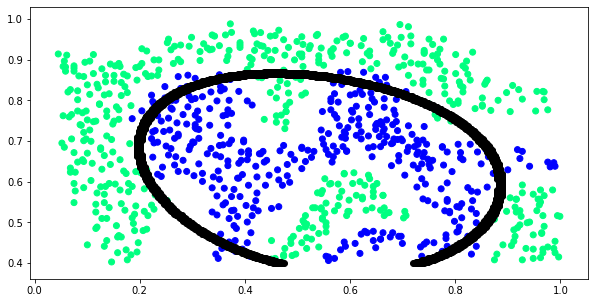

In [189]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plot_decision_boundary(svc_classifier, [-0.2, 1.2], [0.4, 1.2])
plt.show()

$$
C = 10, \sigma = 5
$$

In [190]:
svc_classifier = fit_gaussian_svc(10, 5, X, y[:,0])

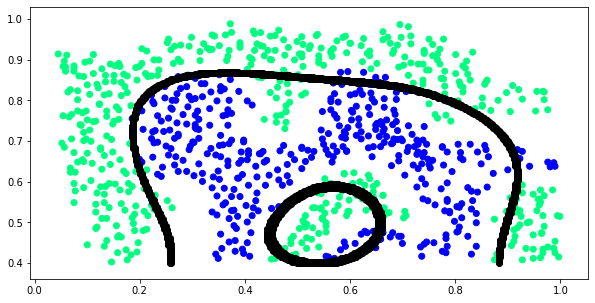

In [191]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plot_decision_boundary(svc_classifier, [-0.2, 1.2], [0.4, 1.2])
plt.show()

$$
C = 10, \sigma = 15
$$

In [192]:
svc_classifier = fit_gaussian_svc(10, 15, X, y[:,0])

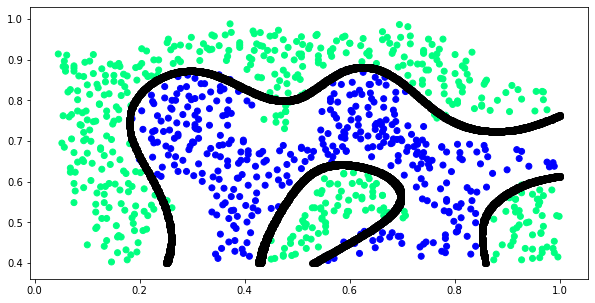

In [193]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plot_decision_boundary(svc_classifier, [-0.2, 1.0], [0.4, 1.0], 1000)
plt.show()

$$
C = 100, \sigma = 100
$$

In [196]:
svc_classifier = fit_gaussian_svc(100, 100, X, y[:,0])

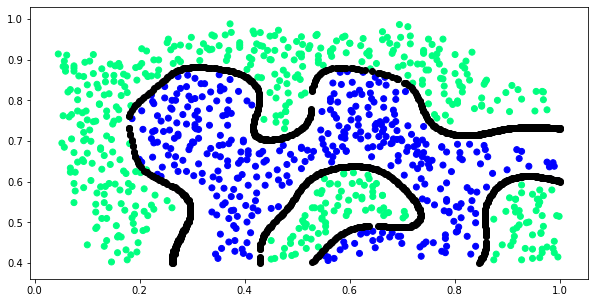

In [197]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plot_decision_boundary(svc_classifier, [-0.2, 1.0], [0.4, 1.2], 500)
plt.show()

## Task 3

Набор данных ex5data3.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит три переменные X<sub>1</sub> и X<sub>2</sub>
(независимые переменные) и y (метка класса). Данные разделены на две
выборки: обучающая выборка (X, y), по которой определяются параметры
модели; валидационная выборка (Xval, yval), на которой настраивается
коэффициент регуляризации и параметры Гауссового ядра.


10.Загрузите данные ex5data3.mat из файла

In [198]:
task3_file_name = "Data\Lab 5\ex5data3.mat"
mat = loadmat(task3_file_name)  # load mat-file
X = mat['X']
y = mat['y']
Xval = mat['Xval']
yval = mat['yval']

11.Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ<sup>2</sup> на валидационной выборке.

In [233]:
grid_search = GridSearchCV(estimator=SVC(kernel=gaussian_kernel(1)), param_grid={"C": np.linspace(1, 100, 10), "gamma": np.linspace(1, 20, 20)})
grid_search.fit(X, y[:,0])
_ = grid_search.predict(Xval)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [234]:
grid_search.best_params_

{'C': 23.0, 'gamma': 18.0}

In [242]:
svc_classifier = fit_gaussian_svc(23, 18, X, y[:,0])
y_pred = svc_classifier.predict(Xval)
np.mean(y_pred == yval.flatten()) * 100

93.0

12.Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

In [244]:
svc_classifier = fit_gaussian_svc(23, 18, X, y[:,0])

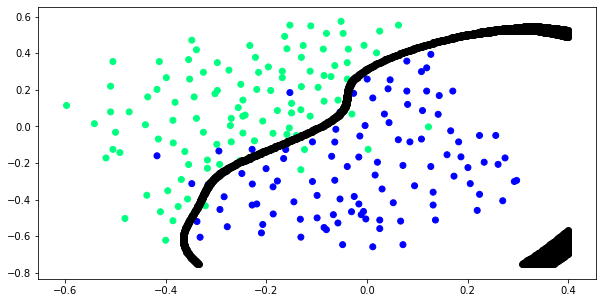

In [245]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plot_decision_boundary(svc_classifier, [-0.6, 0.4], [-0.75, 0.75], 500)
plt.show()

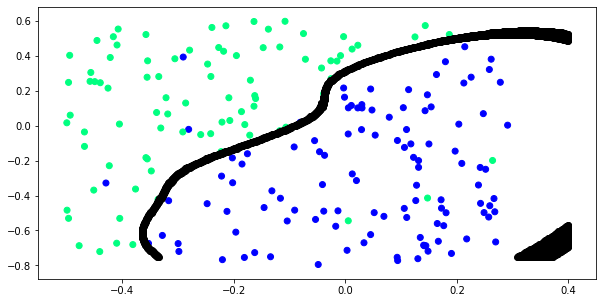

In [246]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(Xval[:, 0], Xval[:, 1], c=yval[:,0], cmap='winter')
plot_decision_boundary(svc_classifier, [-0.6, 0.4], [-0.75, 0.75], 500)
plt.show()

## Task 4

Набор данных spamTrain.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит две переменные X - вектор,
кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в
письме, и y - метка класса: 0 - не спам, 1 - спам. Набор используется для
обучения классификатора.

Набор данных spamTest.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит две переменные Xtest - вектор,
кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в
письме, и ytest - метка класса: 0 - не спам, 1 - спам. Набор используется для
проверки качества классификатора.


13.Загрузите данные spamTrain.mat из файла.

In [411]:
task41_file_name = "Data\Lab 5\spamTrain.mat"
mat = loadmat(task41_file_name)  # load mat-file
mat
X = mat['X']
y = mat['y']

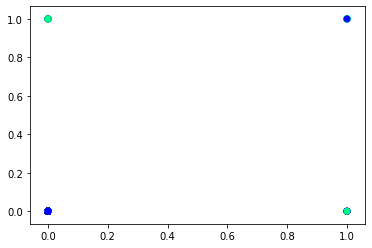

In [390]:
plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap='winter')
plt.show()

14.Обучите классификатор SVM.

In [325]:
svc_classifier = SVC(gaussian_kernel(1), C=10, gamma = 0.005)
_ = svc_classifier.fit(X, y[:,0])

15.Загрузите данные spamTest.mat из файла.

In [257]:
task42_file_name = "Data\Lab 5\spamTest.mat"
mat = loadmat(task42_file_name)  # load mat-file
Xtest = mat['Xtest']
ytest = mat['ytest']

16.Подберите параметры C и σ.

In [275]:
grid_search = GridSearchCV(estimator=SVC(kernel=gaussian_kernel(1)), param_grid={"C": [9, 10, 11], "gamma": [1, 5, 10]})
_ = grid_search.fit(X, y[:,0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [277]:
grid_search.best_params_

{'C': 9, 'gamma': 1}

In [344]:
svc_classifier = SVC(kernel=gaussian_kernel(1), C=10.5, gamma = 0.005)
_ = svc_classifier.fit(X, y[:,0])

In [345]:
y_pred = svc_classifier.predict(Xtest)
np.mean(y_pred == ytest.flatten()) * 100

99.2

17.Реализуйте функцию предобработки текста письма, включающую в себя:
<ul>
  <li>перевод в нижний регистр;</li>
  <li>удаление HTML тэгов;</li>
  <li>замена URL на одно слово (например, “httpaddr”);</li>
  <li>замена email-адресов на одно слово (например, “emailaddr”);</li>
  <li>замена чисел на одно слово (например, “number”);</li>
  <li>замена знаков доллара ($) на слово “dollar”;</li>
  <li>замена форм слов на исходное слово (например, слова “discount”,
“discounts”, “discounted”, “discounting” должны быть заменены на
слово “discount”). Такой подход называется stemming;</li>
  <li>остальные символы должны быть удалены и заменены на
пробелы, т.е. в результате получится текст, состоящий из слов,
разделенных пробелами.</li>
</ul>

In [289]:
def to_lower(text):
    return text.lower()

def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    
    return soup.get_text()

def replace_url(text):
    regx = re.compile(r"(http|https)://[^\s]*")
    text, _ = regx.subn(repl=" httpaddr ", string=text)
    
    return text

def replace_email(text):
    regx = re.compile(r"\b[^\s]+@[^\s]+[.][^\s]+\b")
    text, _ = regx.subn(repl=" emailaddr ", string=text)
    
    return text

def replace_number(text):
    regx = re.compile(r"\b[\d.]+\b")
    text, _ = regx.subn(repl=" number ", string=text)
    
    return text

def replace_dollar(text):
    regx = re.compile(r"[$]")
    text, _ = regx.subn(repl=" dollar ", string=text)
    
    return text

def remove_punctuation(text):
    regx = re.compile(r"([^\w\s]+)|([_-]+)")
    text, _ = regx.subn(repl=" ", string=text)
    
    return text

def remove_new_lines(text):
    regx = re.compile(r"\n")
    text, _ = regx.subn(repl=" ", string=text)
    
    return text

def remove_multiple_whitespaces(text):
    regx = re.compile(r"\s+")
    text, _ = regx.subn(repl=" ", string=text)
    
    return text

def remove_stopwords(text):
    text = text.split(" ")
    keepwords = [word for word in text if word not in stopwords.words('english')]
    
    return " ".join(keepwords)

def stemming(text):
    stemmer = SnowballStemmer('english')
    text = text.split(" ")
    stem_words = [stemmer.stem(word) for word in text]
    
    return " ".join(stem_words)

18.Загрузите коды слов из словаря vocab.txt.

In [290]:
def load_text(fpath):
    with open(fpath, "r") as myfile:
        lines = myfile.readlines()
        
        return "".join(lines)

In [311]:
def vocabulary_upload():
    vocab_text = load_text(r'Data\Lab 5\vocab.txt')
    vocab_lines = vocab_text.split('\n')
    result = {}
    for line in vocab_lines:
        if len(line) > 0:
            line = line.split('\t')
            result[line[1]] = line[0]
    
    return result

19.Реализуйте функцию замены слов в тексте письма после предобработки
на их соответствующие коды.

In [314]:
def vocabulary_replace(words):
    vocab = vocabulary_upload()
    result = []
    for word in words:
        if word in vocab:
            result.append(vocab[word])
    return result

In [380]:
def process(text):
    text = to_lower(text)
    text = remove_html(text)
    text = replace_url(text)
    text = replace_email(text)
    text = replace_number(text)
    text = replace_dollar(text)
    text = remove_punctuation(text)
    text = remove_new_lines(text)
    text = remove_multiple_whitespaces(text)
    text = remove_stopwords(text)
    text = stemming(text)
    words = [word for word in text.split(' ') if len(word) > 0]
    text = " ".join(vocabulary_replace(words))
    
    return text

In [355]:
load_text('Data/Lab 5/emailSample1.txt')

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

20.Реализуйте функцию преобразования текста письма в вектор признаков
(в таком же формате как в файлах spamTrain.mat и spamTest.mat

In [360]:
def transform_text_to_code(text):
    vectorizer = CountVectorizer(vocabulary=vocabulary_upload().values())
    emails_vector = vectorizer.fit_transform(text)
    return emails_vector.toarray()

21.Проверьте работу классификатора на письмах из файлов
emailSample1.txt, emailSample2.txt, spamSample1.txt и
spamSample2.txt.

In [391]:
emails_raw_x = [
    process(load_text('Data/Lab 5/emailSample1.txt')),
    process(load_text('Data/Lab 5/emailSample2.txt')),
    process(load_text('Data/Lab 5/spamSample1.txt')),
    process(load_text('Data/Lab 5/spamSample2.txt'))
]

In [412]:
svc_classifier = SVC(kernel=gaussian_kernel(1), C=10.5, gamma = 0.005)
_ = svc_classifier.fit(X, y[:,0])

In [396]:
emails_code = transform_text_to_code(emails_raw_x)
svc_classifier.predict(emails_code)

array([1, 0, 1, 1], dtype=uint8)

22.Также можете проверить его работу на собственных примерах.

In [397]:
my_email = [process(load_text('Data/Lab 5/myEmail.txt'))]

In [400]:
load_text('Data/Lab 5/myEmail.txt')

'Alex\n \nmy first time posting - have a bit of Unix experience, but am new to Linux.\n'

In [399]:
emails_code = transform_text_to_code(my_email)
svc_classifier.predict(emails_code)

array([0], dtype=uint8)

23.Создайте свой набор данных из оригинального корпуса текстов -
http://spamassassin.apache.org/old/publiccorpus/.


In [418]:
def process(text):
    text = to_lower(text)
    text = remove_html(text)
    text = replace_url(text)
    text = replace_email(text)
    text = replace_number(text)
    text = replace_dollar(text)
    text = remove_punctuation(text)
    text = remove_new_lines(text)
    text = remove_multiple_whitespaces(text)
    text = remove_stopwords(text)
    text = stemming(text)
    
    return text

In [435]:
spam_mails = []
counter = 0
for r, d, f in os.walk(r'Data/Lab 5/spam/'):
    for file in f:
        if counter > 50:
            break
        try:
            spam_mails.append(process(load_text(os.path.join(r, file))))
        except Exception:
            print("Error load " + os.path.join(r, file))
        counter += 1

In [436]:
len(spam_mails)

51

In [433]:
good_mails = []
counter = 0
for r, d, f in os.walk('Data/Lab 5/mail/'):
    for file in f:
        if counter > 50:
            break
        try:
            good_mails.append(process(load_text(os.path.join(r, file))))
        except Exception:
            print(os.path.join(r, file))
        counter += 1

In [434]:
len(good_mails)

51

24.Постройте собственный словарь.

In [438]:
y = [0]*len(good_mails) + [1]*len(spam_mails)
emails = good_mails + spam_mails
flatlist = [word for email in emails for word in email.split(" ")]
counts_dict = collections.Counter(flatlist)
vocab = [key for key in counts_dict]

In [439]:
vectorizer = CountVectorizer(vocabulary=vocab)  
emails_code = vectorizer.transform(emails)
emails_code = emails_code.toarray()

In [442]:
grid_search = GridSearchCV(SVC(kernel=gaussian_kernel(1)), param_grid={"C": np.linspace(1, 100, 10), "gamma": np.linspace(0.005, 1, 20)})
grid_search.fit(emails_code, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
                         'gamma': array([0.005     , 0.05736842, 0.10973684, 0.16210526, 0.21447368,
       0.26684211, 0.31921053, 0.37157895, 0.42394737, 0.47631579,
       0.52868421, 0.58105263, 0.63342105, 0.68578947, 0.73815789,
       0.79052632, 0.84289474, 0.89526316, 0.94763158, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [443]:
grid_search.best_params_

{'C': 12.0, 'gamma': 0.005}

25.Как изменилось качество классификации? Почему?

In [444]:
search.best_score_

0.98075